# 🌲🌳 Random Forest Classifier: A Comprehensive Guide

A **Random Forest** is a powerful ensemble learning method that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Random Forests address the main limitation of individual Decision Trees—their tendency to overfit—by leveraging the wisdom of crowds. By combining predictions from many trees, each trained on different subsets of data and features, Random Forests achieve superior generalization performance.

## Key Concepts:
* **Ensemble Learning**: Combining multiple models to create a stronger predictor
* **Bagging (Bootstrap Aggregating)**: Training each tree on a random sample of the data with replacement
* **Feature Randomness**: Each split in each tree considers only a random subset of features
* **Voting Mechanism**: Final prediction is made by majority vote (classification) or averaging (regression)

This notebook will guide you through implementing a Random Forest Classifier using scikit-learn, comparing it with individual Decision Trees, and exploring feature importance.

---
## 1. Importing Essential Libraries

In [12]:
# Data manipulation and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Scikit-learn modules for modeling, metrics, and data utility
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

---
## 2. Data Loading and Preparation

We'll use the **Wine dataset** for this notebook. It contains 178 samples of wine, categorized into three classes based on 13 chemical features (alcohol content, malic acid, ash, etc.). This dataset is more complex than Iris and better demonstrates the advantages of Random Forests.

### Why Wine Dataset?
* More features (13 vs 4) showcase feature importance analysis
* Slightly more complex decision boundaries
* Better demonstrates the power of ensemble methods

In [3]:
# Load the Wine dataset
wine = load_wine()
X = wine.data  # 13 chemical features
y = wine.target  # Wine class (0, 1, 2)

# Display dataset information
print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"\nFeature names: {wine.feature_names}")
print(f"\nClass names: {wine.target_names}")

Dataset shape: (178, 13)
Number of samples: 178
Number of features: 13
Number of classes: 3

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Class names: ['class_0' 'class_1' 'class_2']


In [4]:
# Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 124
Test set size: 54


---
## 3. Baseline: Single Decision Tree

Before diving into Random Forests, let's establish a baseline using a single Decision Tree. This will help us appreciate the improvement that ensemble methods provide.

In [5]:
# Train a single decision tree (unconstrained)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Single Decision Tree Test Accuracy: {dt_accuracy:.4f}")
print(f"Tree depth: {dt_classifier.get_depth()}")
print(f"Number of leaves: {dt_classifier.get_n_leaves()}")

Single Decision Tree Test Accuracy: 0.9630
Tree depth: 4
Number of leaves: 8


### Observations on Single Decision Tree

A single decision tree, especially when unconstrained, tends to create very deep and complex structures. While it may perform well on training data, it's prone to overfitting and may not generalize well to new, unseen data.

---
## 4. Building a Random Forest Classifier

Now let's build a Random Forest and see how it compares. A Random Forest creates multiple decision trees, each trained on:
1. A **bootstrap sample** of the training data (sampling with replacement)
2. A **random subset of features** at each split

### Key Hyperparameters:
* **n_estimators**: Number of trees in the forest (default: 100)
* **max_features**: Number of features to consider for each split (default: 'sqrt' for classification)
* **max_depth**: Maximum depth of each tree (default: None)
* **min_samples_split**: Minimum samples required to split a node (default: 2)
* **min_samples_leaf**: Minimum samples required at a leaf node (default: 1)
* **bootstrap**: Whether to use bootstrap samples (default: True)

In [6]:
# Initialize Random Forest with 100 trees
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Train the model
rf_classifier.fit(X_train, y_train)

print("Random Forest trained successfully!")
print(f"Number of trees: {rf_classifier.n_estimators}")
print(f"Number of features considered at each split: {rf_classifier.max_features}")

Random Forest trained successfully!
Number of trees: 100
Number of features considered at each split: sqrt


---
## 5. Model Evaluation and Comparison

Let's evaluate the Random Forest on the test set and compare it with our baseline Decision Tree.

In [7]:
# Make predictions with Random Forest
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("="*60)
print("MODEL COMPARISON")
print("="*60)
print(f"Single Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy:        {rf_accuracy:.4f}")
print(f"Improvement:                   {rf_accuracy - dt_accuracy:.4f}")
print("="*60)

MODEL COMPARISON
Single Decision Tree Accuracy: 0.9630
Random Forest Accuracy:        1.0000
Improvement:                   0.0370


In [8]:
# Detailed classification report for Random Forest
print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=wine.target_names))


Random Forest Classification Report:

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



### Understanding the Metrics:
* **Precision**: Of all instances predicted as a certain class, how many were actually that class?
* **Recall**: Of all actual instances of a certain class, how many did we correctly identify?
* **F1-score**: Harmonic mean of precision and recall, providing a balanced measure
* **Support**: Number of actual occurrences of each class in the test set

---
## 6. Confusion Matrix Visualization

A confusion matrix helps us understand which classes are being confused with each other.

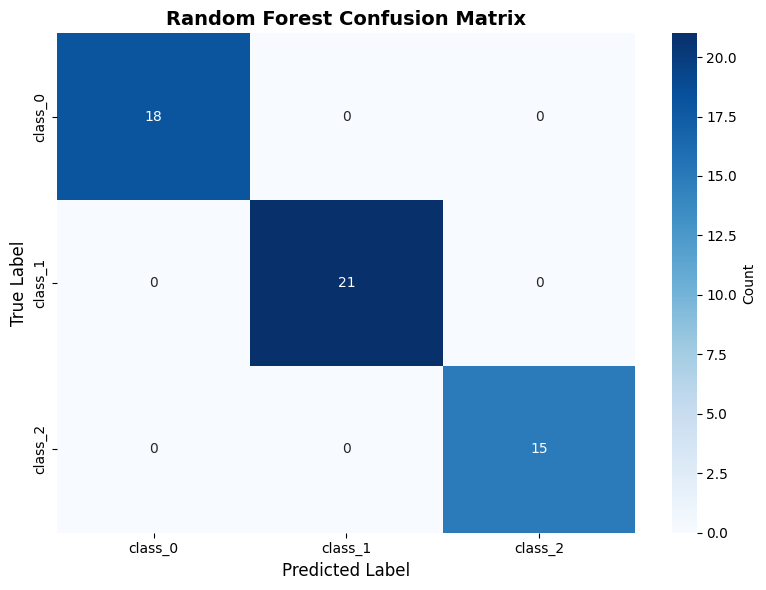

In [9]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=wine.target_names, 
            yticklabels=wine.target_names,
            cbar_kws={'label': 'Count'})
plt.title('Random Forest Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

### Interpreting the Confusion Matrix:
* **Diagonal elements**: Correctly classified samples
* **Off-diagonal elements**: Misclassifications
* Darker colors indicate higher counts
* Perfect predictions would show color only on the diagonal

---
## 7. Cross-Validation: Robust Performance Estimation

A single train-test split might not give us a complete picture of model performance. **Cross-validation** provides a more robust estimate by training and testing the model on different subsets of the data.

We'll use **5-fold cross-validation**, which:
1. Splits the data into 5 equal parts
2. Trains on 4 parts and tests on 1 part
3. Repeats this 5 times, each time using a different part as the test set
4. Reports the mean and standard deviation of the scores

In [10]:
# Perform 5-fold cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')

# Perform 5-fold cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

print("="*60)
print("CROSS-VALIDATION RESULTS (5-Fold)")
print("="*60)
print(f"\nDecision Tree:")
print(f"  Mean Accuracy: {dt_cv_scores.mean():.4f} (+/- {dt_cv_scores.std():.4f})")
print(f"  Individual fold scores: {[f'{s:.4f}' for s in dt_cv_scores]}")

print(f"\nRandom Forest:")
print(f"  Mean Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std():.4f})")
print(f"  Individual fold scores: {[f'{s:.4f}' for s in rf_cv_scores]}")

print(f"\nImprovement: {rf_cv_scores.mean() - dt_cv_scores.mean():.4f}")
print("="*60)

CROSS-VALIDATION RESULTS (5-Fold)

Decision Tree:
  Mean Accuracy: 0.8654 (+/- 0.0440)
  Individual fold scores: ['0.9167', '0.8056', '0.8333', '0.9143', '0.8571']

Random Forest:
  Mean Accuracy: 0.9721 (+/- 0.0176)
  Individual fold scores: ['0.9722', '0.9444', '0.9722', '0.9714', '1.0000']

Improvement: 0.1067


### Why Cross-Validation Matters:
* **Reduces variance** in performance estimates
* **Uses all data** for both training and testing
* **Detects overfitting**: Large gap between training and CV scores indicates overfitting
* **Standard deviation** indicates model stability across different data splits

---
## 8. Feature Importance Analysis

One of the most valuable aspects of Random Forests is their ability to measure **feature importance**. This tells us which features contribute most to the predictions.

### How Feature Importance Works:
For each feature, Random Forest calculates how much the feature decreases the weighted impurity (Gini impurity or entropy) across all trees. Features that lead to larger decreases in impurity are more important.

In [13]:
# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Create a dataframe for better visualization
feature_importance_df = (
    pd.DataFrame({
        'Feature': wine.feature_names,
        'Importance': feature_importances
    })
    .sort_values('Importance', ascending=False)
    .reset_index(drop=True)
)

print("Feature Importance Rankings:\n")
print(feature_importance_df.to_string(index=False))

Feature Importance Rankings:

                     Feature  Importance
                     alcohol    0.162715
             color_intensity    0.159719
                  flavanoids    0.156283
                     proline    0.124081
                         hue    0.111019
od280/od315_of_diluted_wines    0.098852
               total_phenols    0.042004
                   magnesium    0.034591
                  malic_acid    0.033700
           alcalinity_of_ash    0.028841
             proanthocyanins    0.019952
                         ash    0.016418
        nonflavanoid_phenols    0.011825


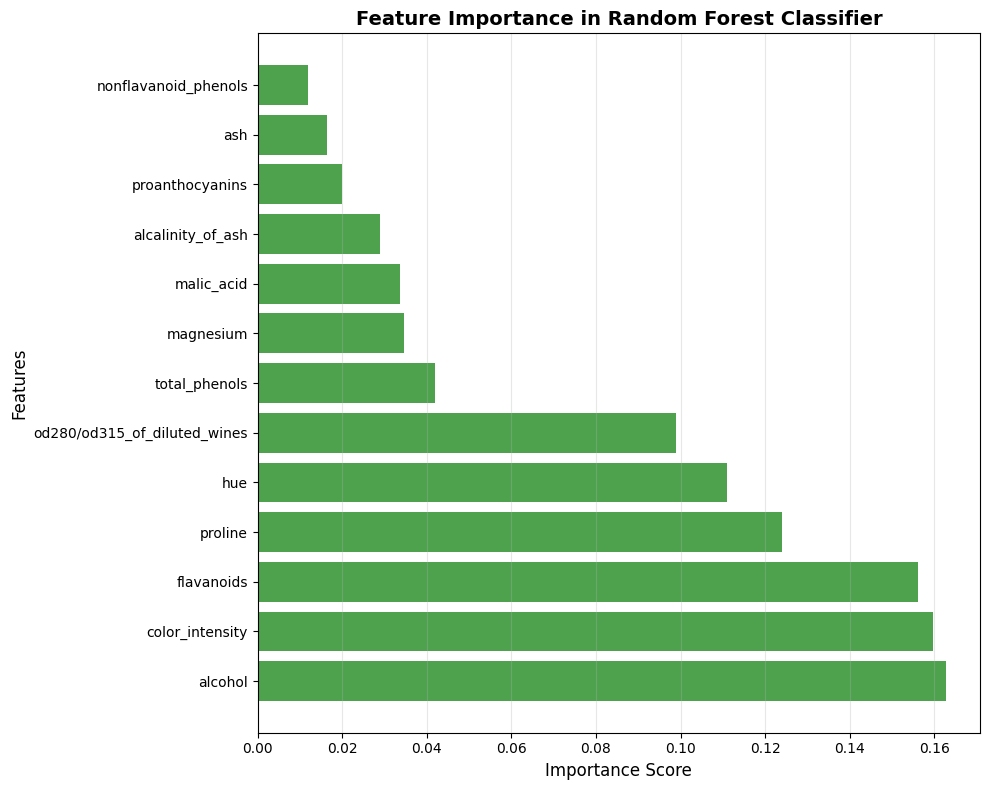

In [14]:
# Visualize feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importances)), 
         feature_importance_df['Importance'],
         color='forestgreen',
         alpha=0.8)
plt.yticks(range(len(feature_importances)), feature_importance_df['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance in Random Forest Classifier', 
          fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### Interpreting Feature Importance:
* **Higher values** indicate more important features for making predictions
* **Sum of all importances** equals 1.0
* Features with very low importance might be **candidates for removal** in feature selection
* Important features are those that, when used for splitting, most effectively separate the classes

---
## 9. Impact of Number of Trees (n_estimators)

How does the number of trees in the forest affect performance? Let's investigate by training Random Forests with different numbers of trees.

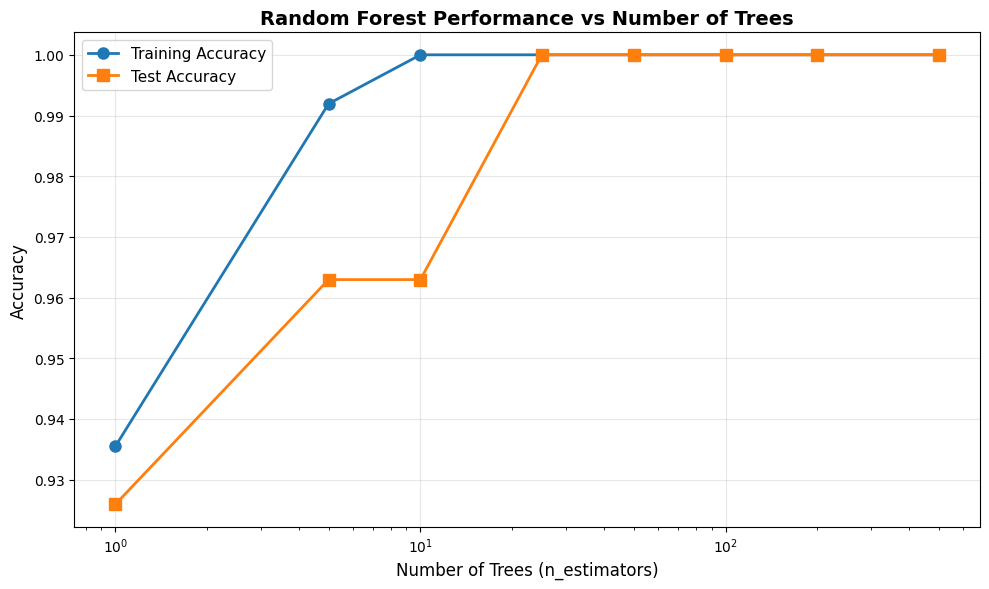

In [15]:
# Test different numbers of trees
n_estimators_range = [1, 5, 10, 25, 50, 100, 200, 500]
train_scores = []
test_scores = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, 'o-', label='Training Accuracy', 
         linewidth=2, markersize=8)
plt.plot(n_estimators_range, test_scores, 's-', label='Test Accuracy', 
         linewidth=2, markersize=8)
plt.xlabel('Number of Trees (n_estimators)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Random Forest Performance vs Number of Trees', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.tight_layout()
plt.show()

### Key Observations:
* **Single tree (n=1)** behaves like a regular Decision Tree
* **Performance improves** rapidly with initial trees
* **Diminishing returns** after a certain point (often 50-200 trees)
* **More trees** generally lead to more stable predictions but increased computation time
* Random Forests typically **don't overfit** with more trees (unlike single trees getting deeper)

---
## 10. Understanding Out-of-Bag (OOB) Score

Random Forests have a built-in cross-validation mechanism called **Out-of-Bag (OOB) evaluation**.

### How OOB Works:
* When using bootstrap sampling, approximately **63.2%** of training samples are selected for each tree
* The remaining **36.8%** (out-of-bag samples) are not used for training that particular tree
* These OOB samples can be used to validate each tree
* The OOB score provides an unbiased estimate of the model's performance without needing a separate validation set

In [16]:
# Train Random Forest with OOB score enabled
rf_oob = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)

rf_oob.fit(X_train, y_train)

print("="*60)
print("OUT-OF-BAG (OOB) EVALUATION")
print("="*60)
print(f"OOB Score: {rf_oob.oob_score_:.4f}")
print(f"Test Score: {rf_oob.score(X_test, y_test):.4f}")
print(f"\nThe OOB score provides a validation estimate without")
print(f"needing a separate validation set!")
print("="*60)

OUT-OF-BAG (OOB) EVALUATION
OOB Score: 0.9758
Test Score: 1.0000

The OOB score provides a validation estimate without
needing a separate validation set!


---
## 11. Hyperparameter Tuning Example

While Random Forests work well with default parameters, we can often improve performance through hyperparameter tuning. Here's an example exploring key parameters.

In [17]:
# Test different max_depth values
max_depths = [3, 5, 10, 15, 20, None]
depth_results = []

for depth in max_depths:
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=depth,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    test_score = rf.score(X_test, y_test)
    depth_results.append((depth, test_score))
    print(f"max_depth={str(depth):5s} -> Test Accuracy: {test_score:.4f}")

print(f"\nBest max_depth: {max(depth_results, key=lambda x: x[1])[0]}")

max_depth=3     -> Test Accuracy: 1.0000
max_depth=5     -> Test Accuracy: 1.0000
max_depth=10    -> Test Accuracy: 1.0000
max_depth=15    -> Test Accuracy: 1.0000
max_depth=20    -> Test Accuracy: 1.0000
max_depth=None  -> Test Accuracy: 1.0000

Best max_depth: 3


### Other Important Hyperparameters to Consider:
* **min_samples_split**: Minimum samples required to split an internal node
* **min_samples_leaf**: Minimum samples required at a leaf node
* **max_features**: Number of features to consider when looking for the best split
  - 'sqrt': Square root of total features (default for classification)
  - 'log2': Log base 2 of total features
  - int: Specific number of features
  - float: Percentage of features
* **max_leaf_nodes**: Maximum number of leaf nodes
* **min_impurity_decrease**: Minimum impurity decrease required for a split

---
## 12. Key Takeaways and Best Practices

### Advantages of Random Forests:
1. **Reduces Overfitting**: By averaging multiple trees, reduces variance
2. **Handles High Dimensionality**: Works well with many features
3. **Feature Importance**: Provides insights into which features matter most
4. **Robust to Outliers**: Less sensitive than individual trees
5. **No Feature Scaling Required**: Works with features on different scales
6. **Handles Missing Values**: Can maintain accuracy with missing data
7. **Parallel Processing**: Trees can be trained independently (n_jobs=-1)

### Disadvantages:
1. **Less Interpretable**: Harder to interpret than a single decision tree
2. **Computationally Expensive**: More memory and time than single trees
3. **Large Model Size**: Storing many trees requires significant memory
4. **Prediction Time**: Slower predictions than single trees

### Best Practices:
1. **Start with defaults**: Often perform well out-of-box
2. **Use cross-validation**: For robust performance estimates
3. **Monitor OOB score**: Quick validation without separate test set
4. **Balance n_estimators**: More trees = better performance but diminishing returns
5. **Consider computational cost**: Use n_jobs=-1 for parallel processing
6. **Feature importance**: Use for feature selection and understanding
7. **Tune carefully**: max_depth, min_samples_split, and max_features are key

### When to Use Random Forests:
* You need high accuracy without much hyperparameter tuning
* You want to understand feature importance
* You have a mix of numerical and categorical features
* Interpretability is less critical than performance
* You have sufficient computational resources

---
## 13. Conclusion

Random Forests represent a significant advancement over single Decision Trees. By combining the predictions of multiple trees, each trained on different subsets of data and features, Random Forests achieve:

* **Better generalization** through ensemble averaging
* **Reduced overfitting** compared to individual deep trees
* **Robust performance** across various datasets
* **Valuable insights** through feature importance analysis

The "wisdom of crowds" principle—that many imperfect predictors can combine to create a strong predictor—is beautifully demonstrated by Random Forests. They remain one of the most popular and effective machine learning algorithms for both research and production environments.